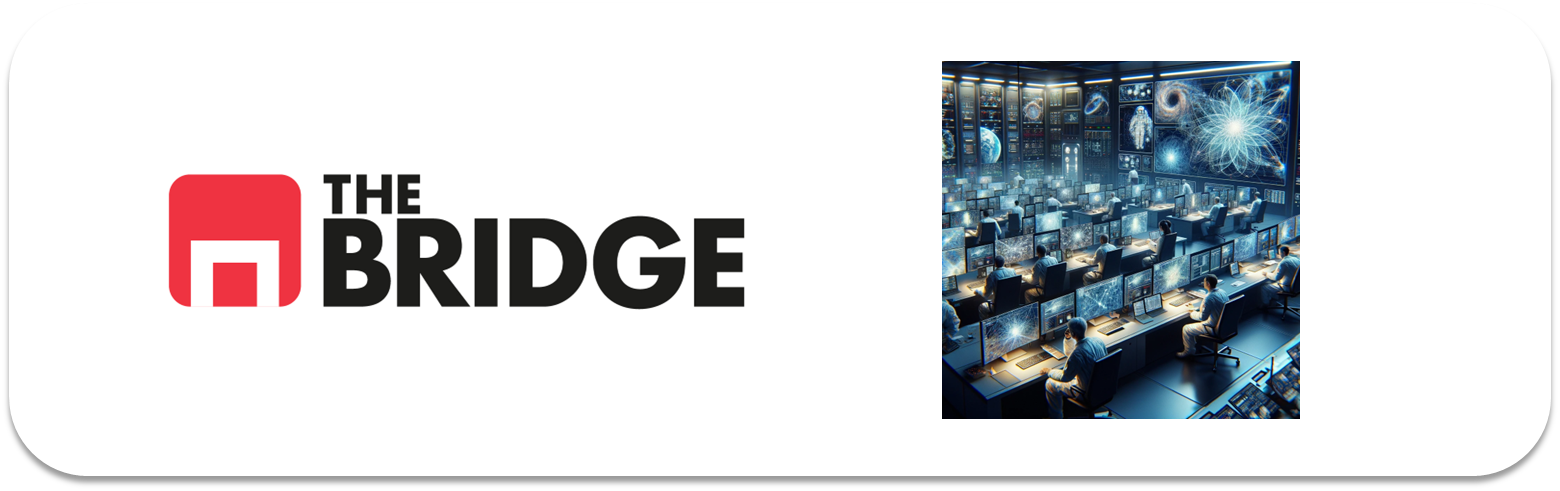

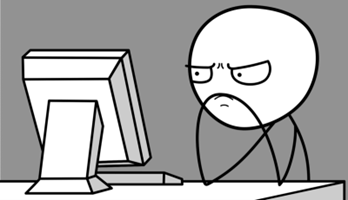

Para ejercitarte y afianzar lo aprendido sobre **Redes Convolucionales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import os
import zipfile

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from skimage.io import imread
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Import whole class and then access using fully qualified names
from keras._tf_keras import keras

# Pylance not working
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers


## El problema de "Negocio"
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en:

https://www.kaggle.com/datasets/puneet6060/intel-image-classification?select=seg_test 

Como `seg_train.zip` y `seg_test.zip` (o bien en el botón de download).  

NOTA: Son archivos bastante grandes (386MB en total). Por supuesto, no es necesario que tengas que mantenerlos en tu ordenador una vez realizado el ejercicio, bórralos si es el caso.




### Ejercicio 1

Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones). Para ello:

1. Descarga las imagenes del repositorio de Kaggle en el directorio que vayas a emplear para el ejercicio.
2. Descomprime los datos (son ficheros de imágenes) de forma que tengas dos subdirectorios seg_train y seg_test en el que estén ya colgando directamente los directorios de cada clase de paisajes. Si descargaste seg_pred, puedes eliminarlo.
3. Crea unas variables como las siguientes (ajustándolas a tu caso/rutas particulares):

```python
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"
```
4. Utiliza la siguiente función para crear los X_train, y_train y X_test e y_test:

```python
def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)
```


In [2]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is F616-7494

 Directory of c:\Users\Lander\Documents\GitHub\ONLINE_DS_THEBRIDGE_2024\06_Deep_Learning\S19_DL_Imagenes\U01_Redes_Convolucionales_I\Ejercicios_Workout

10/16/2024  10:54    <DIR>          .
10/16/2024  08:57    <DIR>          ..
10/16/2024  10:50           630,850 13_Ejercicios_Practica_Redes_Convolucionales.ipynb
10/16/2024  08:55         1,688,053 13_Ejercicios_Practica_Redes_Convolucionales_SOL.ipynb
10/16/2024  11:17    <DIR>          data
               2 File(s)      2,318,903 bytes
               3 Dir(s)  194,602,299,392 bytes free


In [3]:
# Crear un directorio
!mkdir data

A subdirectory or file data already exists.


In [41]:
# Descomprimir el contenido del fichero descargado de Kaggle
path_to_zip_file = "./data/archive.zip"
directory_to_extract_to = "./data/"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

*Ahora copiamos lo que nos dicen y lo aplicamos a los dos directorios para tener las X y las y*

In [38]:
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "seg_train/seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/seg_test/"


In [39]:
def read_data(directorio, reshape_dim=(32, 32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        print(folder)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                # Redimensionamos las imágenes a 32x32
                image = cv2.resize(image, reshape_dim) 

                X.append(image)
                y.append(folder)

    return np.array(X), np.array(y)

In [7]:
print('Leyendo "train":')
X_train, y_train = read_data(TRAIN_PATH)

print('\nLeyendo "test":')
# Nota: podríamos dejar la creación de X_test para el final antes 
# de usarlo y así ahorra memoria mientras no tengamos que emplearlo
X_test, y_test = read_data(TEST_PATH) 

Leyendo "train":
buildings
forest
glacier
mountain
sea
street

Leyendo "test":
buildings
forest
glacier
mountain
sea
street


In [19]:
X_train.shape

(14034, 32, 32, 3)

In [11]:
type(X_train)

numpy.ndarray

*Para ahorrar tiempo en el futuro y porque ocupa menos, lo que voy a hacer es almacenar en local los numpy.ndarray.*

In [12]:
# Guardar las variables en archivos separados
np.save('./data/X_train.npy', X_train)
np.save('./data/y_train.npy', y_train)
np.save('./data/X_test.npy', X_test)
np.save('./data/y_test.npy', y_test)


### Si no quiero volver a cargar las imágenes, ejecutar solo desde aquí.

In [2]:
# Cargar las variables guardadas
X_train = np.load('./data/X_train.npy')
y_train = np.load('./data/y_train.npy')
X_test = np.load('./data/X_test.npy')
y_test = np.load('./data/y_test.npy')

In [3]:
X_train.shape

(14034, 32, 32, 3)

*Son tensores de colores (3D - RGB)*

### Ejercicio 2

Haz la visualización del dataset: comprueba cuantos datos tienes, que forma, investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.


In [4]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (14034, 32, 32, 3)
y_train shape:  (14034,)


*14034 imagenes de 32x32 con 3 canales para los colores en el train*

In [5]:
print('X_test shape: ', X_test.shape)
print('y_text shape: ', y_test.shape)

X_test shape:  (3000, 32, 32, 3)
y_text shape:  (3000,)


*3000 imagenes en el test*

*Adaptemos nuestra clásica función de pintado de imágenes*

In [6]:
def show_images_batch(images, titles=[], n_cols=5, size_scale=2, cmap="Greys"):
    """
    Displays a batch of images in a grid layout using matplotlib.

    Parameters:
    -----------
    images : list or array-like
        A list or array containing image data to be displayed. Each element
        should be an individual image (2D or 3D array depending on the image type).
    
    titles : list, optional (default=[])
        A list of titles for each image. If provided, each image will be displayed
        with its corresponding title. The length of this list should match the
        number of images. If no titles are provided, no titles will be shown.
    
    n_cols : int, optional (default=5)
        The number of columns in the grid. This determines how many images will
        be displayed per row. The total number of rows will be computed automatically.
    
    size_scale : float, optional (default=2)
        Scaling factor for the size of the images. Larger values will increase the
        size of each individual image in the grid.
    
    cmap : str, optional (default='Greys')
        The color map to use when displaying the images. Useful when showing grayscale
        images. You can change it to other colormaps like 'viridis', 'plasma', etc.
    
    Returns:
    --------
    None
        This function displays a plot of the images but does not return any values.

    Examples:
    ---------
    >>> show_images_batch([image1, image2, image3], titles=['Image 1', 'Image 2', 'Image 3'], n_cols=3)
    """
    
    n_rows = (len(images) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1 * size_scale))
    
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap=cmap)
        plt.axis("off")
        if len(titles):
            plt.title(titles[index])
    plt.show()


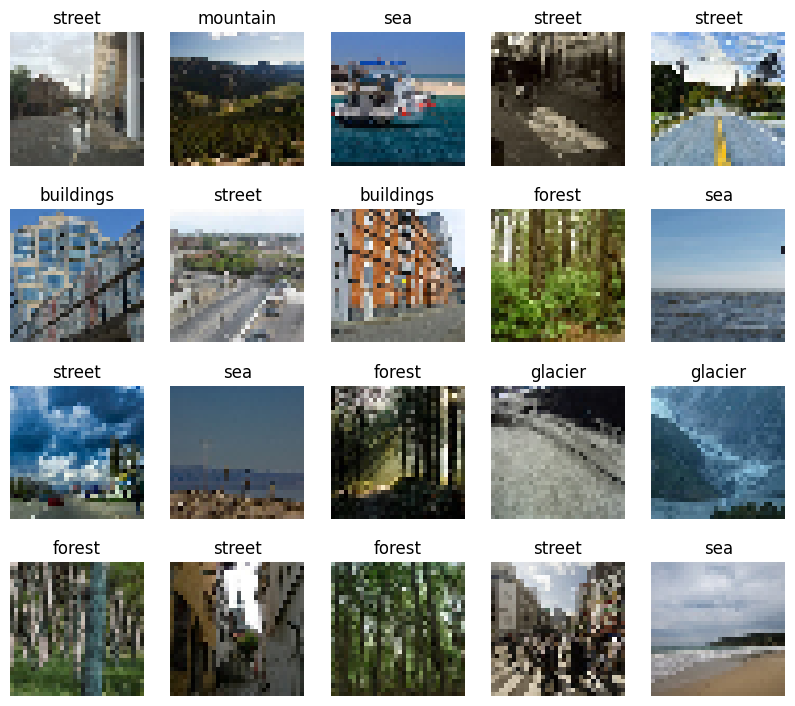

In [7]:
indices = np.random.randint(0, len(X_train), 20)
show_images_batch(X_train[indices], 
                  titles=y_train[indices], 
                  n_cols = 5)

*A nuestra vista, la reduccion de la resolución afecta, si quieres puedes cambiar el tamaño de resolución y probar, pero ya sabes que será a costa de tiempo de computación*

### Ejercicio 3

Ahora haz un pequeño miniEda y normaliza las features



*Veamos la distribución de cada tipo de paisaje*

In [8]:
pd.Series(y_train).value_counts(normalize=True)

mountain     0.178994
glacier      0.171298
street       0.169731
sea          0.162035
forest       0.161821
buildings    0.156121
Name: proportion, dtype: float64

*Tenemos que construir un clasificador multiclase con 6 clases posibles que están más o menos balanceadas aunque hay una ligera superioridad de muestra de paisajes de montaña respecto al de edificios.*

*Y ahora un clásico de la normalización de imágenes:*

In [9]:
# Normalizar los datos
X_train = X_train / 255
X_test = X_test / 255

*Recuerda que normalizar es bueno aunque estén en la misma escala por un lado porque las funciones de activación sulen trabajar mejor en rangos entre -1,0 y 1 (sobre todo las tanh, sigmoide, etc) y por otro porque valores altos de entrada sientan peor a la hora de hacer el gradiente descendente con backpropagation*

### Ejercicio 4

Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada. Como guía, copia parte de la arquitectura del workout (un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer)


Quiero hacer una estructura similar a la que hicimos en el workout y similar a esta, aunque habrá diferencias.

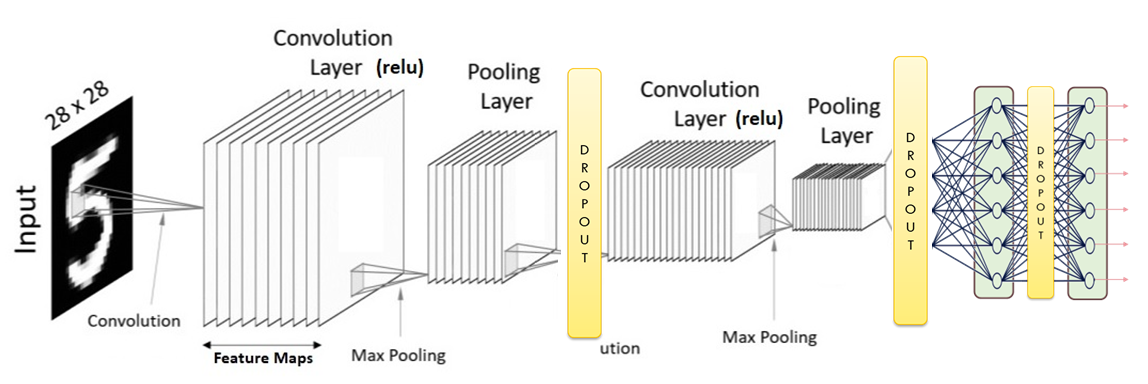



In [10]:
X_train[0].shape

(32, 32, 3)

In [11]:
# Primero definimos las capas de la red, en este caso partimos de 30 filtros de 3x3, 
# seguido de una capa de pooling de 2x2, y un Dropout al 25 %.
# El input shape es el tamaño de las imágenes de entrada, en nuestro caso 32x32x3.
# El tamaño del kernel es pequeño pero suele ser de este tipo y más con resoluciones tan bajas, 
# el número de filtros está escogido de aquella manera,

layers = [keras.layers.Conv2D(filters=30,
                              kernel_size=(3, 3),
                              padding='same', 
                              activation='relu',
                              input_shape = X_train[0].shape),
          keras.layers.MaxPool2D(pool_size=(2, 2),
                                 strides=(2, 2)),
          keras.layers.Dropout(rate=0.25),
          
          # Segunda capa de convolución, pooling y dropout
          keras.layers.Conv2D(filters=15,
                              kernel_size = (3, 3),
                              padding = 'same',
                              activation = 'relu'),
          keras.layers.MaxPooling2D(pool_size=(2, 2),
                                    strides=(2, 2)),
          keras.layers.Dropout(rate=0.25),
          
          # Añadimos una capa de flatten para convertir la salida de la capa de dropout en un vector
          keras.layers.Flatten(),
          
          # Primera capa densa de clasificación, más dropout
          keras.layers.Dense(units=150, 
                             activation='relu'),
          keras.layers.Dropout(rate=0.25),
          
          # Segunda capa densa de clasificación, más dropout
          keras.layers.Dense(units=100, 
                             activation='relu'),
          keras.layers.Dropout(rate=0.25),
          
          # Añadimos la capa de salida con 6 neuronas, una por cada clase
          keras.layers.Dense(units=6, 
                             activation='softmax')
          ]

# Crear el modelo
model = keras.models.Sequential(layers=layers)

c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


`NOTA`: La solución de Alberto no utiliza Dropout, pero todo lo demás es idéntica.

### Ejercicio 5

Escoge el resto de hiperparámetros (optimizador, learning_rate, función de pérdida, métrica,...) y compila el modelo. Muestra un resumen del mismo

*Para escoger el optimizador me fijo en el tamaño del dataset*

In [12]:
# 14034 fotos de train
X_train.shape 

(14034, 32, 32, 3)

In [13]:
X_train.size

43112448

*Dado el tamaño podemos usar un adam, cuyos hiperparámetros por defecto suelen funcionar bastante bien*

*Como el target es unidimensional usaré sparse_categorical_crossentropy, y como métrica dado el balanceo la accuracy.*


In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
              )

*Ahora el resumen del modelo*


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │       144,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,761 (643.60 KB)

 Trainable params: 164,761 (643.60 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 6

Entrena el modelo reservando un 20% de los datos del entrenamiento para validar y con los callbacks que creas necesarios. NOTA: Ojo, tendrás que preparar un poco los X,y antes.



*Primero tendremos que convertir nuestro target a un número entero.*

In [16]:
pd.Series(y_train).unique()

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype=object)

In [17]:
# Rehusando la serie que creamos para ver la distribución del target
mapa = {tipo: indice for indice, tipo in enumerate(pd.Series(y_train).unique())} 
mapa

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [18]:
y_train_num = np.array([mapa[y] for y in y_train])
y_test_num = np.array([mapa[y] for y in y_test])

In [19]:
y_train_num[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

*Además los datos están ordenados, por lo que debemos hacer un shuffle*

In [20]:
# Revolvemos los datos para que el modelo no aprenda en orden de las imágenes
X_train, y_train_num = shuffle(X_train, y_train_num)

In [21]:
# Queremos recuperar los pesos de la mejor de las epocas durante el periodo de patience
cb_earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=10, 
                                                 restore_best_weights= True
                                                 )
history = model.fit(x=X_train,
                    y=y_train_num,
                    batch_size = 32,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[cb_earlystopping]) 

Epoch 1/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3962 - loss: 1.4521 - val_accuracy: 0.6320 - val_loss: 0.9794
Epoch 2/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6132 - loss: 1.0070 - val_accuracy: 0.6470 - val_loss: 0.8990
Epoch 3/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6729 - loss: 0.8645 - val_accuracy: 0.7157 - val_loss: 0.7802
Epoch 4/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7088 - loss: 0.7981 - val_accuracy: 0.7339 - val_loss: 0.7440
Epoch 5/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7338 - loss: 0.7344 - val_accuracy: 0.7364 - val_loss: 0.7370
Epoch 6/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7498 - loss: 0.7021 - val_accuracy: 0.7467 - val_loss: 0.6983
Epoch 7/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7472 - loss: 0.6794 - val_accuracy: 0.7709 - val_loss: 0.6488
Epoch 8/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7773 - loss: 0.6290 - val_accu


### Ejercicio 7

Representa el objeto history y comenta la evolución de tu entrenamiento.



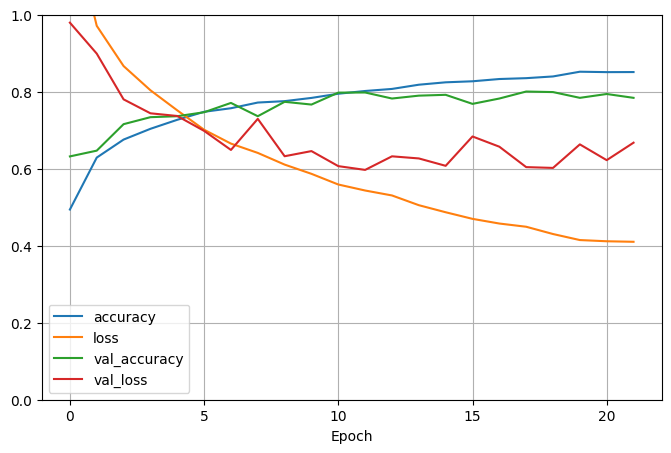

In [22]:
# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

*Separando "loss" y "métrica"*

*Observando la evolución de la métrica.*

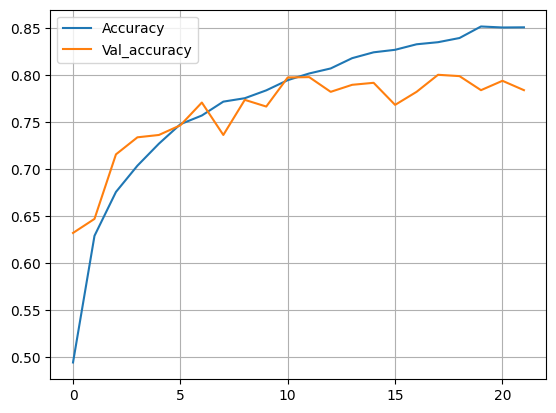

In [24]:
# Representamos el objeto history
history_df = pd.DataFrame(history.history)

plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'Val_accuracy')
plt.grid(True)
plt.legend()
plt.show();

*Observando la evolución de la pérdida:*

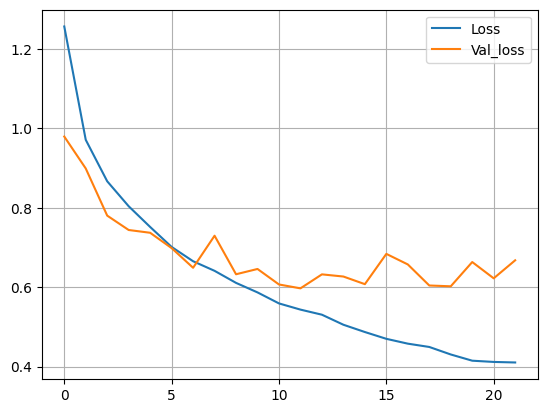

In [25]:
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'Val_loss')
plt.grid(True)
plt.legend()
plt.show();

*En ambas figuras se ve que pasadas las primeras 5-6 épocas, sólo estamos consiguiendo es hacer overfitting y más superadas las 10 épocas en la que incluso sube el error de validación y el de train sigue bajando*


### Ejercicio 8

Evalua el modelo con los datos de test, además muestra el report de clasificación y la matriz de confusión.



In [26]:
model.evaluate(X_test, y_test_num)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7651 - loss: 0.6482


[0.6171348094940186, 0.784333348274231]

*Un 78% de accuracy que se traduce en el siguiente report*

In [27]:
y_pred = [np.argmax(prediction) for prediction in model.predict(X_test)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [28]:
inverse_map = {valor: clave for clave, valor in mapa.items()}

y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

   buildings       0.79      0.67      0.72       437
      forest       0.92      0.92      0.92       474
     glacier       0.70      0.82      0.76       553
    mountain       0.78      0.73      0.75       525
         sea       0.79      0.71      0.75       510
      street       0.77      0.84      0.80       501

    accuracy                           0.78      3000
   macro avg       0.79      0.78      0.78      3000
weighted avg       0.79      0.78      0.78      3000



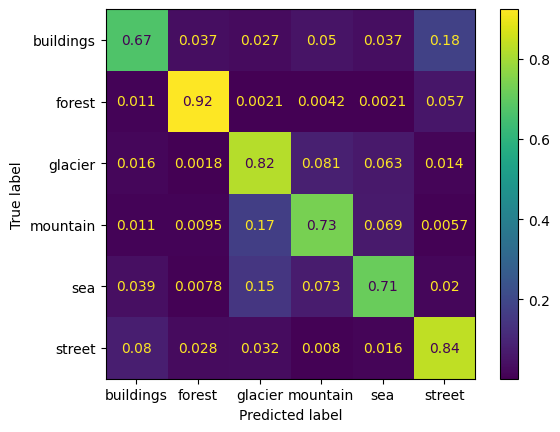

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test_labels,
                                        y_pred_labels, 
                                        normalize="true")

*Hay un rectángulo interesante en el centro de la matriz, los glaciares (los paisajes peor detectados) se confunden principalmente con montañas, aunque estas se reconocen bastante bien. El mar también se confunde cuando lo hace con montañas. Esto hace que la precisión de las montañas baje. El mejor clasificado son los bosques seguido de las calles. Los edificios tampoco se clasifican bien y como era de esperar se confunden con las calles*


### Ejercicio 9 

Representa algunos de los paisajes donde el modelo comete errores y muestra la confianza que tenía en ellos.





In [31]:
confianza = [prediction.max() for prediction in model.predict(X_test)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [32]:
pred_df = pd.DataFrame({"True": y_test_labels, "Predicted": y_pred_labels, "Confianza": confianza})

In [33]:
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending=False)
errores

,True,Predicted,Confianza
79,buildings,forest,0.998906
434,buildings,street,0.997442
88,buildings,street,0.991959
1807,mountain,glacier,0.988122
86,buildings,street,0.986139
...,...,...,...
2149,sea,street,0.257258
2208,sea,forest,0.249918
1270,glacier,sea,0.247337
1266,glacier,mountain,0.237295


In [35]:
for true_label, predicted_label in errores.iloc[0:10, 0:2].values:
    print(true_label, ':', predicted_label)

buildings : forest
buildings : street
buildings : street
mountain : glacier
buildings : street
buildings : street
street : buildings
glacier : sea
buildings : street
sea : glacier


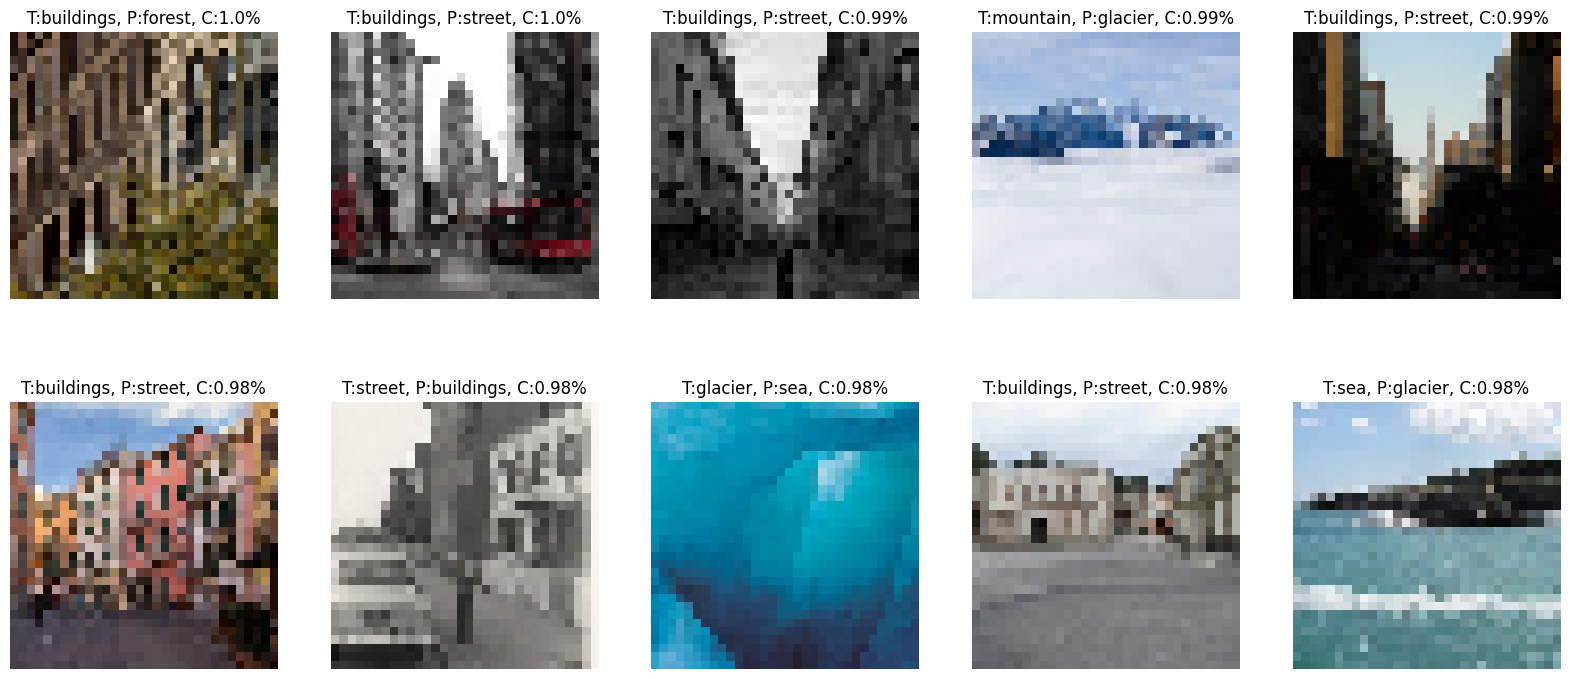

In [36]:
show_images_batch(X_test[errores.iloc[0:10].index],
                  titles=[f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1, val2, val3 in errores.iloc[0:10].values], 
                  size_scale=4)

### Ejercicio EXTRA: 

Aumenta la resolución y repite el ejercicio con la misma topología de red

In [42]:
print('Leyendo "train":')
X_train, y_train = read_data(TRAIN_PATH, (64, 64))

print('\nLeyendo "test":')
X_test, y_test = read_data(TEST_PATH, (64, 64)) 

Leyendo "train":
buildings
forest
glacier
mountain
sea
street

Leyendo "test":
buildings
forest
glacier
mountain
sea
street


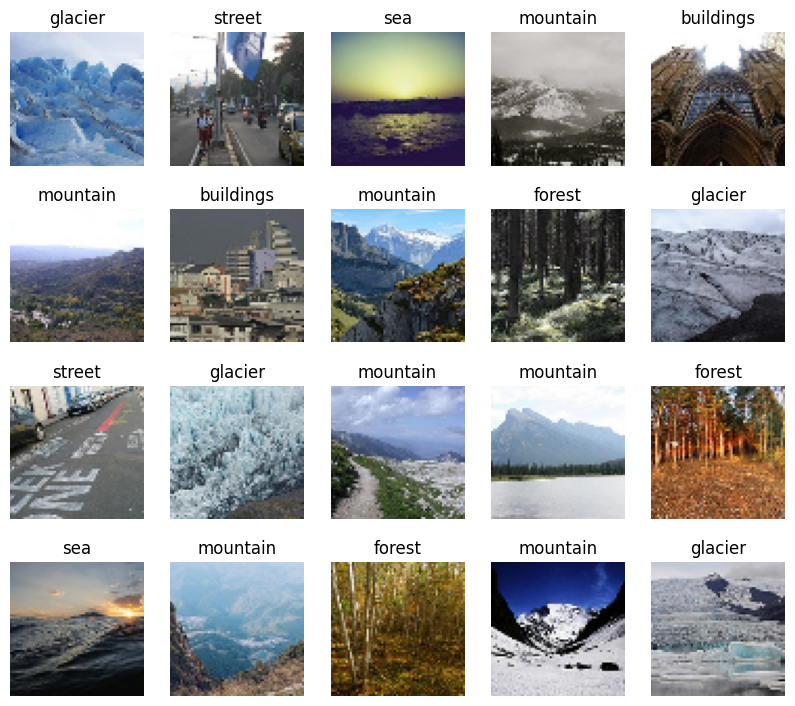

In [43]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], 
                  titles=y_train[indices], 
                  n_cols = 5)

*Desde luego, se ven con mucha más nitidez que antes.*

In [44]:
# Convertir el target en numérico
y_train_num = np.array([mapa[y] for y in y_train])
y_test_num = np.array([mapa[y] for y in y_test])

# Remover los datos
X_train, y_train_num = shuffle(X_train, y_train_num)

In [45]:
# Mismo modelo que antes
layers = [keras.layers.Conv2D(filters=30,
                              kernel_size=(3, 3),
                              padding='same', 
                              activation='relu',
                              input_shape = X_train[0].shape),
          keras.layers.MaxPool2D(pool_size=(2, 2),
                                 strides=(2, 2)),
          keras.layers.Dropout(rate=0.25),
          
          # Segunda capa de convolución, pooling y dropout
          keras.layers.Conv2D(filters=15,
                              kernel_size = (3, 3),
                              padding = 'same',
                              activation = 'relu'),
          keras.layers.MaxPooling2D(pool_size=(2, 2),
                                    strides=(2, 2)),
          keras.layers.Dropout(rate=0.25),
          
          # Añadimos una capa de flatten para convertir la salida de la capa de dropout en un vector
          keras.layers.Flatten(),
          
          # Primera capa densa de clasificación, más dropout
          keras.layers.Dense(units=150, 
                             activation='relu'),
          keras.layers.Dropout(rate=0.25),
          
          # Segunda capa densa de clasificación, más dropout
          keras.layers.Dense(units=100, 
                             activation='relu'),
          keras.layers.Dropout(rate=0.25),
          
          # Añadimos la capa de salida con 6 neuronas, una por cada clase
          keras.layers.Dense(units=6, 
                             activation='softmax')
          ]

# Crear el modelo
model = keras.models.Sequential(layers=layers)

# Compilar
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Resumen
model.summary()

c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 150)            │       576,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,761 (2.28 MB)

 Trainable params: 596,761 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Queremos recuperar los pesos de la mejor de las epocas durante el periodo de patience
cb_earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=10, 
                                                 restore_best_weights= True
                                                 )
history = model.fit(x=X_train,
                    y=y_train_num,
                    batch_size = 32,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[cb_earlystopping]) 

Epoch 1/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1902 - loss: 16.1520 - val_accuracy: 0.1845 - val_loss: 1.7889
Epoch 2/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2954 - loss: 1.6714 - val_accuracy: 0.2793 - val_loss: 1.6610
Epoch 3/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3811 - loss: 1.5256 - val_accuracy: 0.2921 - val_loss: 1.6396
Epoch 4/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4346 - loss: 1.3680 - val_accuracy: 0.4282 - val_loss: 1.4009
Epoch 5/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4707 - loss: 1.2743 - val_accuracy: 0.5126 - val_loss: 1.2129
Epoch 6/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5038 - loss: 1.2191 - val_accuracy: 0.5173 - val_loss: 1.2069
Epoch 7/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5312 - loss: 1.1557 - val_accuracy: 0.5315 - val_loss: 1.2128
Epoch 8/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5377 - loss: 1.1329 -

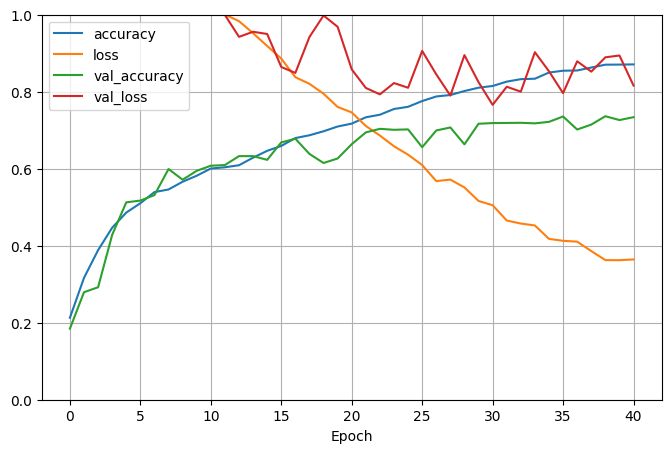

In [47]:
# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

In [48]:
model.evaluate(X_test, y_test_num)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7129 - loss: 0.8239


[0.8454838991165161, 0.6983333230018616]

*A pesar de haber subido la resolución y haber tocado la red tenemos peore prestaciones... Deberíamos jugar con más hiperparámetros o quizás hacer la red mas profunda*

In [49]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [50]:
inverse_map = {valor:clave for clave,valor in mapa.items()}

y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

   buildings       0.72      0.70      0.71       437
      forest       0.88      0.91      0.89       474
     glacier       0.71      0.46      0.56       553
    mountain       0.57      0.77      0.65       525
         sea       0.64      0.63      0.64       510
      street       0.74      0.76      0.75       501

    accuracy                           0.70      3000
   macro avg       0.71      0.70      0.70      3000
weighted avg       0.71      0.70      0.69      3000



In [51]:
confianza = [prediction.max() for prediction in model.predict(X_test)]
pred_df = pd.DataFrame({"True": y_test_labels, "Predicted": y_pred_labels, "Confianza": confianza})

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [52]:
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending = False)
errores

,True,Predicted,Confianza
79,buildings,forest,0.999989
2670,street,forest,0.999988
2634,street,forest,0.999980
2750,street,forest,0.999977
50,buildings,sea,0.999755
...,...,...,...
2112,sea,street,0.246868
410,buildings,mountain,0.233142
2071,sea,street,0.223822
2190,sea,mountain,0.212539


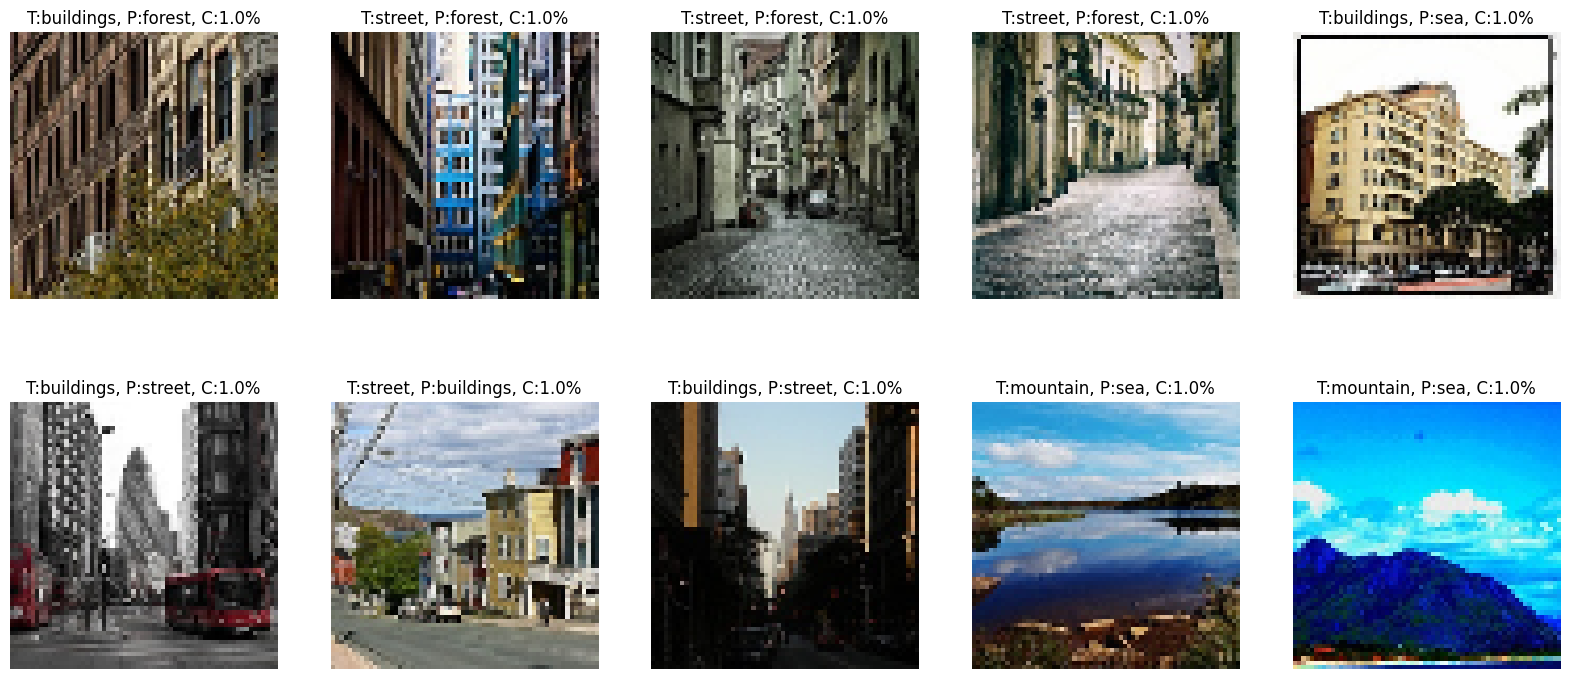

In [54]:
show_images_batch(X_test[errores.iloc[0:10].index],
                  titles=[f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1,val2,val3 in errores.iloc[0:10].values], 
                  size_scale=4
                  )

*A veces piensa uno si no estará mal etiquetado :-)*